# Section 1: Importing Necessary Libraries
# Importing required libraries for data manipulation, visualization, and analysis

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('Packages imported successfully')

Packages imported successfully


# Section 2: Loading the Dataset
# Load the loan dataset and display its structure to understand its contents

In [245]:
df=pd.read_csv("loan.csv")
print('Data loaded successfully')
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')


Data loaded successfully
The dataset contains 39717 rows and 111 columns.


# Section 3: Initial Data Exploration
### Checking the first few rows, data types, and basic statistics of the dataset


In [246]:
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [247]:
print(df.tail())

          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN       

In [248]:
print(df.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

### Section 4: Data Cleaning


In [249]:
# Count the total number of missing values in each column
# This helps identify which columns have missing data and sorts them in descending order
df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [250]:
#Calculate the percentage of missing values for each column
# Divide the number of missing values in a column by the total number of rows in the DataFrame
missing_perc = df.isna().sum() / len(df) * 100

# Filter the column names where missing values > 40%
columns_with_high_missing = missing_perc[missing_perc > 40].index.tolist()

# Display the result
print("Columns with more than 40% missing values:")
print(columns_with_high_missing)


Columns with more than 40% missing values:
['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl

In [251]:
# Dropping all the columns as these columns will not help in any analysis for the case study
df.drop(columns=columns_with_high_missing, axis=1, inplace=True)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [253]:
### These columns are either not required for analysis or duplicate because similar value can be derived from a different column

extra_columns_to_be_deleted = ['member_id','url', 'collection_recovery_fee','desc', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'title', 'emp_title', 'zip_code', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec_bankruptcies',  'revol_bal', 'revol_util', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',  'last_credit_pull_d', 'collections_12_mths_ex_med','tax_liens', 'chargeoff_within_12_mths', 'sub_grade', 'pymnt_plan','issue_d', 'policy_code','total_acc']

df.drop(columns=extra_columns_to_be_deleted, axis=1, inplace=True)



In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   funded_amnt          39717 non-null  int64  
 3   funded_amnt_inv      39717 non-null  float64
 4   term                 39717 non-null  object 
 5   int_rate             39717 non-null  object 
 6   installment          39717 non-null  float64
 7   grade                39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

### Checking 'na' values again to see if any data can be corrected

In [256]:
df.isna().sum()

id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
pub_rec                   0
application_type          0
acc_now_delinq            0
delinq_amnt               0
dtype: int64

### Starting with emp_length column first as it is of type Object

In [258]:
df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [189]:
test_length = len(df['emp_length'])
test_length

39717

In [259]:
### First deleting the rows with NA values
df1 = df.dropna(subset='emp_length')

In [260]:
df1.isna().sum()


id                     0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
pub_rec                0
application_type       0
acc_now_delinq         0
delinq_amnt            0
dtype: int64

In [261]:
### method to clean up the employee length values
### Convert the values into by removing extra string values and symbols
def refactor_emp_length(emp_length):

    if emp_length == '< 1 year':
        return 0
    elif emp_length == '10+ years':
        return 10
    else:
        return int(emp_length.split()[0])

## Saving the data into a new Data Frame
df1['emp_length'] = df1['emp_length'].apply(refactor_emp_length)

In [262]:
df1['emp_length']

0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38642, dtype: int64

In [263]:
df1.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'pub_rec', 'application_type', 'acc_now_delinq',
       'delinq_amnt'],
      dtype='object')

In [264]:
df1.isna().sum()

id                     0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
pub_rec                0
application_type       0
acc_now_delinq         0
delinq_amnt            0
dtype: int64

In [199]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38642 non-null  int64  
 1   loan_amnt            38642 non-null  int64  
 2   funded_amnt          38642 non-null  int64  
 3   funded_amnt_inv      38642 non-null  float64
 4   term                 38642 non-null  object 
 5   int_rate             38642 non-null  object 
 6   installment          38642 non-null  float64
 7   grade                38642 non-null  object 
 8   sub_grade            38642 non-null  object 
 9   emp_length           38642 non-null  int64  
 10  home_ownership       38642 non-null  object 
 11  annual_inc           38642 non-null  float64
 12  verification_status  38642 non-null  object 
 13  issue_d              38642 non-null  object 
 14  loan_status          38642 non-null  object 
 15  pymnt_plan           38642 non-null  obje

### Converting the values of term column


In [266]:
df1['term']

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38642, dtype: object

In [268]:
### term column is of type Object. We are extracting only the int value
df1['term'] = df1['term'].str.extract('(\d+)').astype(int)

AttributeError: Can only use .str accessor with string values!

In [269]:
df1['term']

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 38642, dtype: int64

### Converting the int_rate column to float


In [270]:
df1['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38642, dtype: object

In [271]:
df1['int_rate'] = df1['int_rate'].str.rstrip('%').astype(float)

In [272]:
df1['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38642, dtype: float64

### Checking home_ownership values and removing any unwanted rows

In [274]:
df1['home_ownership'].value_counts()

home_ownership
RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
NONE            3
Name: count, dtype: int64

In [275]:
df1 = df1.loc[df1['home_ownership']!='NONE']


In [276]:
df1['home_ownership'].value_counts()

home_ownership
RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
Name: count, dtype: int64

In [277]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38639 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38639 non-null  int64  
 1   loan_amnt            38639 non-null  int64  
 2   funded_amnt          38639 non-null  int64  
 3   funded_amnt_inv      38639 non-null  float64
 4   term                 38639 non-null  int64  
 5   int_rate             38639 non-null  float64
 6   installment          38639 non-null  float64
 7   grade                38639 non-null  object 
 8   emp_length           38639 non-null  int64  
 9   home_ownership       38639 non-null  object 
 10  annual_inc           38639 non-null  float64
 11  verification_status  38639 non-null  object 
 12  loan_status          38639 non-null  object 
 13  purpose              38639 non-null  object 
 14  addr_state           38639 non-null  object 
 15  dti                  38639 non-null  floa

In [212]:
df1['home_ownership'] = df1['home_ownership'].astype(str)
print(df1['home_ownership'].dtype)

object


In [213]:
print(df1['home_ownership'].dtype)

object


In [214]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38639 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38639 non-null  int64  
 1   loan_amnt            38639 non-null  int64  
 2   funded_amnt          38639 non-null  int64  
 3   funded_amnt_inv      38639 non-null  float64
 4   term                 38639 non-null  int64  
 5   int_rate             38639 non-null  float64
 6   installment          38639 non-null  float64
 7   grade                38639 non-null  object 
 8   emp_length           38639 non-null  int64  
 9   home_ownership       38639 non-null  object 
 10  annual_inc           38639 non-null  float64
 11  verification_status  38639 non-null  object 
 12  issue_d              38639 non-null  object 
 13  loan_status          38639 non-null  object 
 14  pymnt_plan           38639 non-null  object 
 15  purpose              38639 non-null  obje

### Working on loan_status column and removing the rows with the status as "Current"


In [278]:
df1['loan_status'].value_counts()

loan_status
Fully Paid     32142
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [280]:
### Assigning the a new data frame
df_latest = df1.loc[df1['loan_status']!='Current']

In [293]:
### Assigning binary values to 'Fully Paid' and 'Charged Off' for easy analysis
df_latest['loan_status'] = df_latest['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [282]:
df_latest[['loan_amnt','int_rate','dti', 'annual_inc','installment']].describe()

,loan_amnt,int_rate,dti,annual_inc,installment
count,37541.000000,37541.000000,37541.000000,3.754100e+04,37541.000000
mean,11119.771050,11.963580,13.284309,6.940618e+04,324.662009
std,7354.173376,3.683037,6.660676,6.467839e+04,208.903386
min,500.000000,5.420000,0.000000,4.000000e+03,15.690000
25%,5500.000000,8.940000,8.160000,4.100000e+04,167.380000
50%,10000.000000,11.830000,13.380000,6.000000e+04,280.000000
75%,15000.000000,14.420000,18.550000,8.300000e+04,429.040000
max,35000.000000,24.400000,29.990000,6.000000e+06,1305.190000


In [284]:
df_latest['installment'].value_counts()

installment
311.11    68
311.02    54
180.96    53
150.80    46
368.45    45
          ..
186.84     1
748.32     1
711.44     1
148.04     1
255.43     1
Name: count, Length: 14799, dtype: int64

In [285]:
df_latest['installment'] = df_latest['installment'].astype(int)

In [286]:
df_latest['installment'].value_counts()

installment
311     225
155     186
186     155
248     155
156     153
       ... 
1218      1
1302      1
1022      1
1237      1
15        1
Name: count, Length: 1048, dtype: int64

In [287]:
df_latest[['loan_amnt','int_rate','dti', 'annual_inc','installment']].describe()


,loan_amnt,int_rate,dti,annual_inc,installment
count,37541.000000,37541.000000,37541.000000,3.754100e+04,37541.000000
mean,11119.771050,11.963580,13.284309,6.940618e+04,324.166351
std,7354.173376,3.683037,6.660676,6.467839e+04,208.910477
min,500.000000,5.420000,0.000000,4.000000e+03,15.000000
25%,5500.000000,8.940000,8.160000,4.100000e+04,167.000000
50%,10000.000000,11.830000,13.380000,6.000000e+04,280.000000
75%,15000.000000,14.420000,18.550000,8.300000e+04,429.000000
max,35000.000000,24.400000,29.990000,6.000000e+06,1305.000000


In [288]:
df_latest.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'pub_rec', 'application_type', 'acc_now_delinq',
       'delinq_amnt'],
      dtype='object')

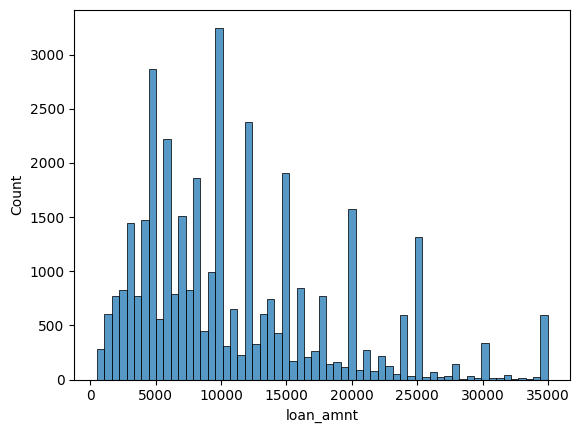

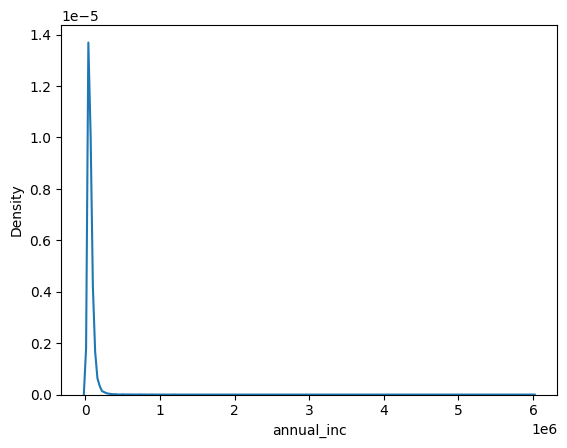

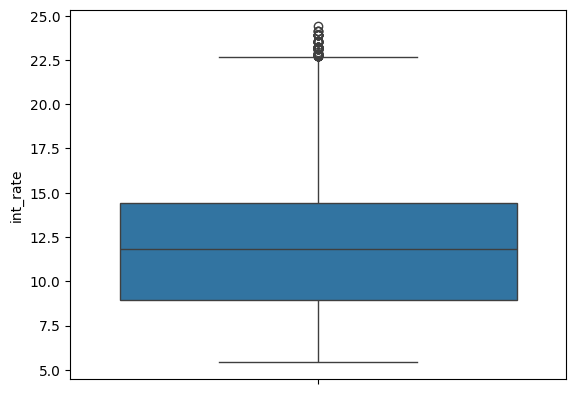

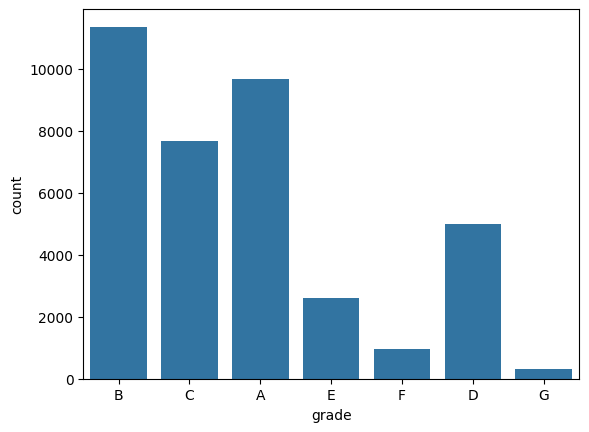

In [289]:
# Distribution plots
sns.histplot(data=df_latest, x='loan_amnt')
plt.show()
sns.kdeplot(data=df_latest, x='annual_inc')
plt.show()
sns.boxplot(data=df_latest, y='int_rate')
plt.show()
# Count plots for categorical
sns.countplot(data=df_latest, x='grade')
plt.show()

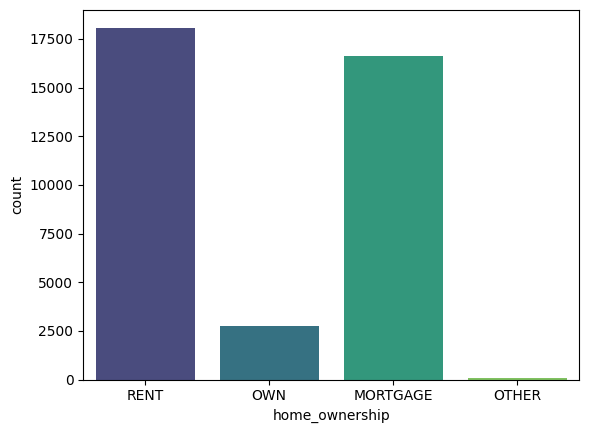

In [294]:
sns.countplot(data=df_latest, x='home_ownership', palette='viridis')
plt.show()

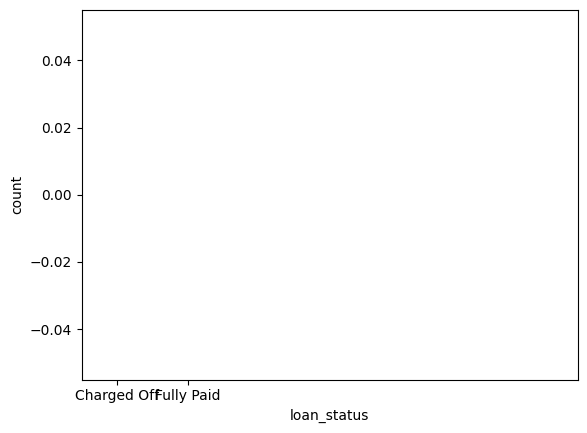

In [295]:
sns.countplot(data=df_latest, x='loan_status', palette='inferno')
plt.xticks([0, 1], ['Charged Off', 'Fully Paid'])
plt.show()